# MAT281 - Tarea 2

**Indicaciones**:

* En los **Ejercicio 1-8** puedes utilizar tanto `matplotlib` como `altair` según te parezca más conveniente o cómodo, en ambos casos cada gráfico debe tener elementos mínimos como:
    - Título
    - Nombre de los ejes, leyendas, etc. en formato _amigable_/_humano_, por ejemplo, si la columna del dataframe en cuestión tiene por nombre `casos_confirmados` se espera que el eje del gráfico tenga por nombre `Casos confirmados`.
    - Colores adecuados al tipo de datos.
    - Un tamaño adecuado para ver con facilidad en una pantalla con resolución HD o FullHD.
    - Cada vez que no se cumplan alguna de estos requerimientos se descontará __1 punto__ de la nota final.

* Para el **Ejercicio 9** es obligación utilizar `altair`.
* Cada ejercicio debe estar acompañado con una celda con comentarios o análisis que puedas desprender de los gráficos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import ipywidgets as widgets

from datetime import date
from ipywidgets import interactive, interact

pd.set_option('display.max_columns', 999)
alt.data_transformers.enable('data_server')
alt.themes.enable('opaque')

%matplotlib inline

**COVID-19 en Chile** 

En esta tarea exploraremos los datos de Covid-19 en Chile a profundidad. Las siguientes celdas cargarán los datos a utilizar en tu sesión. Es importante que leas la documentación de cada conjunto de datos para comprender las columnas.

In [2]:
start_date = pd.to_datetime("2020-04-13")

In [3]:
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto6
confirmados = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto6/bulk/data.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
    .assign(fecha=lambda x: pd.to_datetime(x["fecha"]))
    .loc[lambda x: x["fecha"] >= start_date]
    .dropna()
    .astype({"casos_confirmados": np.float, "tasa": np.float})
)

confirmados.head()

,poblacion,casos_confirmados,fecha,region_id,region,provincia_id,provincia,comuna_id,comuna,tasa
0,247552.0,270.0,2020-04-27,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,109.067994
1,247552.0,9138.0,2020-10-12,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,3691.345657
2,247552.0,596.0,2020-05-29,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,240.757497
3,247552.0,6131.0,2020-08-17,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,2476.651370
4,247552.0,353.0,2020-05-11,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,142.596303


In [4]:
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto19
activos = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto19/CasosActivosPorComuna.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
    .loc[lambda x: x["codigo_comuna"].notnull()]
    .melt(id_vars=["region", "codigo_region", "comuna", "codigo_comuna", "poblacion"], var_name="fecha", value_name="casos_activos")
    .assign(fecha=lambda x: pd.to_datetime(x["fecha"]))
    .loc[lambda x: x["fecha"] >= start_date]
)

activos.head()

,region,codigo_region,comuna,codigo_comuna,poblacion,fecha,casos_activos
0,Arica y Parinacota,15,Arica,15101.0,247552.0,2020-04-13,88.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,2020-04-13,0.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,2020-04-13,0.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0,2020-04-13,0.0
4,Tarapaca,1,Alto Hospicio,1107.0,129999.0,2020-04-13,8.0


In [5]:
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto14
fallecidos = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto14/FallecidosCumulativo.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
    .melt(id_vars=["region"], var_name="fecha", value_name="fallecidos")
    .assign(
        fecha=lambda x: pd.to_datetime(x["fecha"]),
    )
    .loc[lambda x: x["fecha"] >= start_date]
)

fallecidos.head()

,region,fecha,fallecidos
374,Arica y Parinacota,2020-04-13,1.0
375,Tarapacá,2020-04-13,0.0
376,Antofagasta,2020-04-13,1.0
377,Atacama,2020-04-13,0.0
378,Coquimbo,2020-04-13,0.0


In [6]:
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto10
fallecidos_etareo = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto10/FallecidosEtario.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
    .melt(id_vars=["grupo_de_edad"], var_name="fecha", value_name="fallecidos")
    .assign(
        fecha=lambda x: pd.to_datetime(x["fecha"]),
        grupo_de_edad=lambda x: x["grupo_de_edad"].str.replace("<=39", "0-39")
    )
    .loc[lambda x: x["fecha"] >= start_date]
)

fallecidos_etareo.head()

,grupo_de_edad,fecha,fallecidos
28,0-39,2020-04-13,3
29,40-49,2020-04-13,2
30,50-59,2020-04-13,3
31,60-69,2020-04-13,12
32,70-79,2020-04-13,29


## Ejercicio 1

(10 puntos)

Mostrar cantidad de fallecidos la fecha por cada grupo etáreo.

In [7]:
df_ej1 = fallecidos_etareo.tail(7)
df_ej1

,grupo_de_edad,fecha,fallecidos
1652,0-39,2020-12-01,350
1653,40-49,2020-12-01,519
1654,50-59,2020-12-01,1547
1655,60-69,2020-12-01,3256
1656,70-79,2020-12-01,4337
1657,80-89,2020-12-01,3987
1658,>=90,2020-12-01,1434


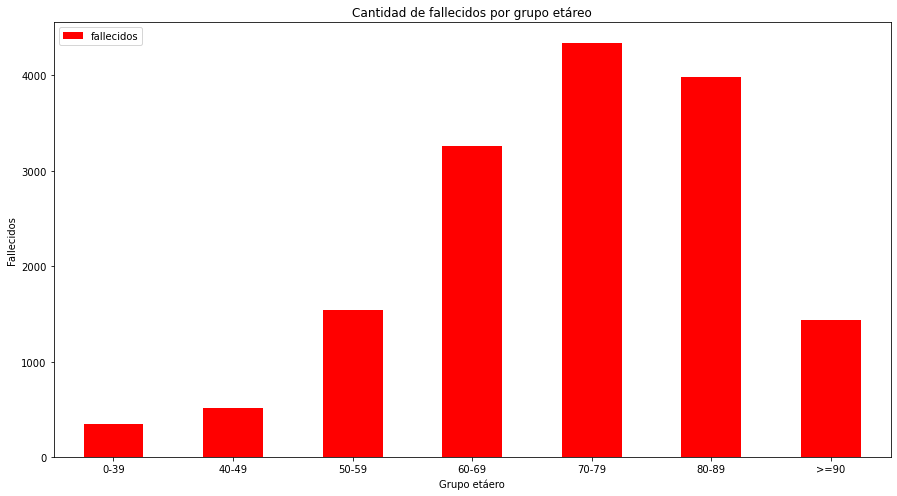

In [8]:
df_ej1.plot.bar(
    x="grupo_de_edad", y="fallecidos", align='center', color='red', rot=0, title='Cantidad de fallecidos por grupo etáreo', figsize=(15,8)
)
plt.xlabel('Grupo etáero')
plt.ylabel('Fallecidos')
plt.legend(loc='upper left')

plt.show()

**Comentarios:** Extraje los últimos datos del dataframe para hacer el gráfico, creo que un gráfico de barras es lo mejor para visualizar esta parte. Además, cambié la localización de la leyenda.

## Ejercicio 2

(10 puntos)

¿Qué tan variable es la población de las comunas de Chile? Considera utilizar un gráfico que resuma de buena forma la información sin agregar la variable de región o provincia.

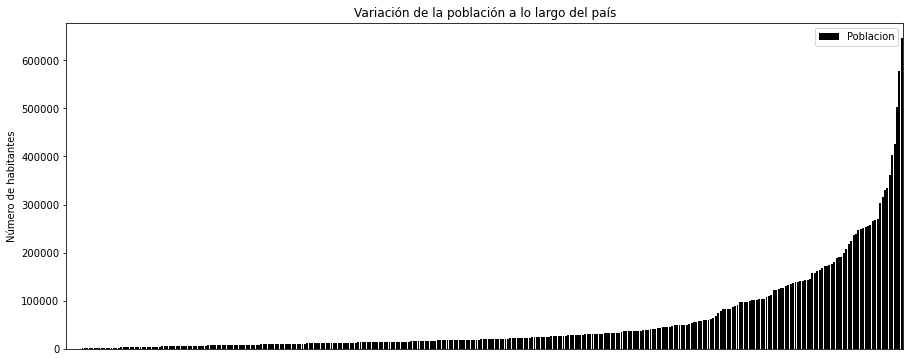

In [9]:
df_ej2 = activos.groupby("comuna").agg(Poblacion=("poblacion", "max")).sort_values(["Poblacion"]).reset_index()
df_ej2.reset_index().plot.bar(
    x='index', y="Poblacion", title="Variación de la población a lo largo del país", color='black', figsize=(15,6), width=0.8
)
plt.ylabel('Número de habitantes')
plt.xlabel('')
plt.xticks([])
plt.axis([None, None, 0, None])

plt.show()

In [10]:
df_ej2.describe()

,Poblacion
count,346.000000
mean,56237.890173
std,88945.967089
min,137.000000
25%,9649.250000
50%,19770.000000
75%,55441.250000
max,645909.000000


**Comentarios:** Me costó elegir un gráfico apropiado para esta pregunta, dado que se quiere comparar la variación opté por este gráfico de barras y ordenar la población de menor a mayor. Lo ideal hubiese sido ocupar datos estadísticos (como la desviación estándar) para mostrar la variabilidad. Por último, no le puse un nombre al eje x ya que son los nombres de las distintas comunas y se vería muy colapsado, además, es irrelevante para ver la variación.

## Ejercicio 3

(10 puntos)

Mostrar evolución y comparación de los fallecimientos entre distintos grupos etáreos, pero que al mismo tiempo sea fácil identificar la cantidad de fallecidos total en cada fecha.

In [11]:
# fallecidos_etareo.loc[lambda x: x["grupo_de_edad"] == '0-39']

In [12]:
df_ej3 = fallecidos_etareo


alt.Chart(df_ej3).mark_line().encode(
    alt.X('fecha', title='Fecha'),
    alt.Y('fallecidos', title="Número de fallecidos"),
    alt.Color('grupo_de_edad', title="Grupo etáreo")
).properties(
    title='Cantidad de fallecidos',
    width=600
)

alt.Chart(...)

**Comentarios:** Se puede ver un aumento abrupto en Julio para cada grupo, me parece interesante ese "salto". Elegí hacer el gráfico con altair porque no supe cómo superponer las líneas (pude hacer cada gráfico por separado con matplotlib).

## Ejercicio 4

(10 puntos)

Mostrar en tres gráficos la evolución de casos confirmados, evolución de fallecimientos y evolución de casos activos.

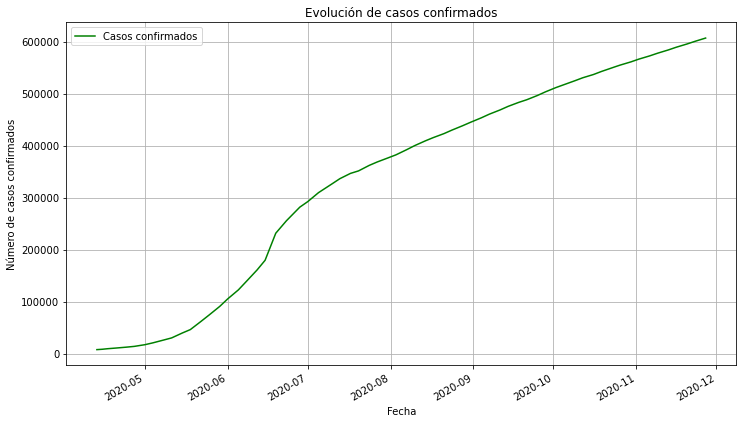

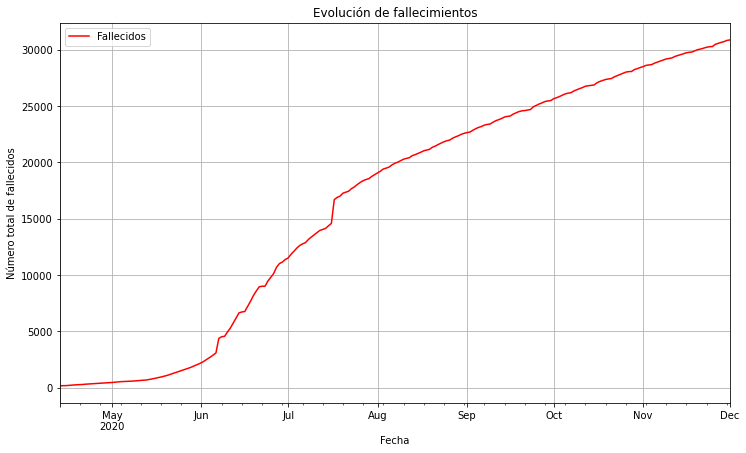

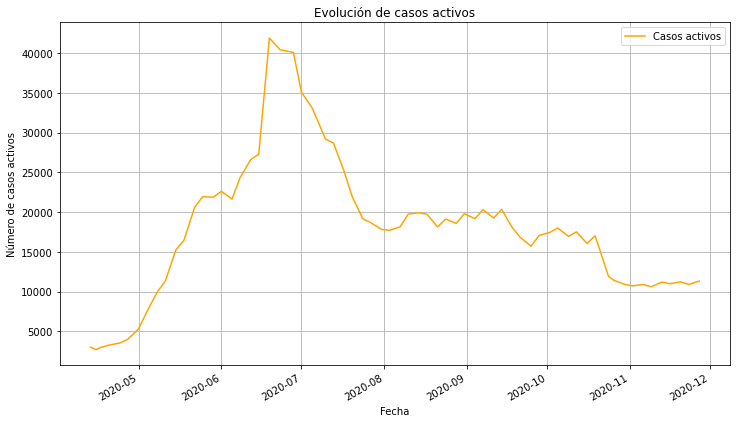

In [13]:
df_ej4_1 = confirmados.groupby("fecha").agg(casos_confirmados=("casos_confirmados", "sum")).reset_index()
df_ej4_2 = fallecidos.groupby("fecha").agg(fallecidos=("fallecidos", "sum")).reset_index()
df_ej4_3 = activos.groupby("fecha").agg(casos_activos=("casos_activos", "sum")).reset_index()

df_ej4_1.plot(x='fecha', y='casos_confirmados', title='Evolución de casos confirmados', color='green', figsize=(12,7), label='Casos confirmados')
plt.ylabel('Número de casos confirmados')
plt.xlabel('Fecha')
plt.grid()
df_ej4_2.plot(x='fecha', y='fallecidos', title='Evolución de fallecimientos', color='red', figsize=(12,7), label='Fallecidos')
plt.ylabel('Número total de fallecidos')
plt.xlabel('Fecha')
plt.grid()
df_ej4_3.plot(x='fecha', y='casos_activos', title='Evolución de casos activos', color='orange', figsize=(12,7), label='Casos activos')
plt.ylabel('Número de casos activos')
plt.xlabel('Fecha')
plt.grid()

**Comentarios:** Nuevamente se puede ver un cambio abrupto entre Junio y Agosto. Tal vez superponer los gráficos sería buena idea (como la pregunta anterior).

## Ejercicio 5

(10 puntos)

Comparar la tasa de incidencia entre las regiones a lo largo del tiempo.

In [14]:
df_ej5 = confirmados.groupby(["region", "fecha"]).apply(
    lambda x: x["casos_confirmados"].sum()*100000/x["poblacion"].sum()
    ).to_frame('tasa').reset_index()
df_ej5

,region,fecha,tasa
0,Antofagasta,2020-04-13,21.536336
1,Antofagasta,2020-04-15,25.438893
2,Antofagasta,2020-04-17,30.497764
3,Antofagasta,2020-04-20,38.158340
4,Antofagasta,2020-04-24,53.190413
...,...,...,...
1051,Ñuble,2020-11-13,2064.701271
1052,Ñuble,2020-11-16,2103.602573
1053,Ñuble,2020-11-20,2154.623879
1054,Ñuble,2020-11-23,2197.239376


In [15]:
alt.Chart(df_ej5).mark_line().encode(
    alt.X('fecha', title='Fecha'),
    alt.Y('tasa', title="Tasa de incidencia"),
    alt.Color('region', title="Región", scale=alt.Scale(scheme='category20'))
).properties(
    title='Tasa de incidencia por región',
    width=600
)

alt.Chart(...)

**Comentarios:** Se ve que la región de Magallanes es la que tiene mayor tasa de incidencia actualmente, por otro lado, se ven dos "secciones" intermedias donde se agrupan varias regiones.

## Ejercicio 6

(10 puntos)

¿Hay alguna conclusión que puedas obtener rápidamente al graficar un _scatter plot_ con los casos confirmados y tasa de incidencia de cada comuna para los días 13 de abril y 6 de noviembre del 2020? Además, colorea cada punto según la región a la que pertenece y considera si es útil en el gráfico que el tamaño sea proporcional a la población.

In [16]:
df_ej6_1 = confirmados.loc[lambda x: x["fecha"] == pd.to_datetime("2020-04-13")]
alt.Chart(df_ej6_1).mark_point().encode(
    alt.X('casos_confirmados', title='Casos confirmados'),
    alt.Y('tasa', title='Tasa de incidencia'),
    alt.Color('region', title="Región", scale=alt.Scale(scheme='category20')),
    size=alt.Size('poblacion:Q')
).properties(
    title='Casos confirmados y tasa de incidencia para el 13 de abril del 2020',
    width=700
)

alt.Chart(...)

In [17]:
df_ej6_2 = confirmados.loc[lambda x: x["fecha"] == pd.to_datetime("2020-11-06")]
alt.Chart(df_ej6_2).mark_point().encode(
    alt.X('casos_confirmados', title='Casos confirmados'),
    alt.Y('tasa', title='Tasa de incidencia'),
    alt.Color('region', title="Región", scale=alt.Scale(scheme='category20')),
    size=alt.Size('poblacion:Q')
).properties(
    title='Casos confirmados y tasa de incidencia para el 06 de noviembre del 2020',
    width=700
)

alt.Chart(...)

**Comentarios:** Se ve que la tasa de incidencia se ha hecho mucho más variable con el tiempo. No existe una relación muy clara entre los casos confirmados y la tasa de incidencia. Incluir el tamaño de población puede ser útil, como es de esperarse, con mayor población hay mayor cantidad de casos confirmados.

## Ejercicio 7

(10 puntos)

1. Grafica la evolución de los casos activos de cada comuna en un solo gráfico. 
2. Grafica la evolución de los casos activos de cada comuna en gráficos separados por región.

Entrega los pros y contras de cada uno de estos enfoques.

In [18]:
df_ej7 = activos
alt.Chart(df_ej7).mark_line().encode(
    alt.X('fecha', title='Fecha'),
    alt.Y('casos_activos', title='Casos activos'),
    alt.Color('comuna', title="Comuna", scale=alt.Scale(scheme='category20'))
).properties(
    title='Casos activos por comuna',
    width=700
)

alt.Chart(...)

In [19]:
df_ej7_2 = activos
lista_region = df_ej7_2["region"].unique()
for i in lista_region:
    df_i = df_ej7_2.loc[lambda x: x["region"] == i]
    plot_7_i = alt.Chart(df_i).mark_line().encode(
        alt.X('fecha', title='Fecha'),
        alt.Y('casos_activos', title='Casos activos'),
        alt.Color('comuna', title="Comuna", scale=alt.Scale(scheme='category20'))
    ).properties(
        title='Casos activos en la región de ' + i,
        width=700
    )
    plot_7_i.display()



alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

**Comentarios:** Es mucho más útil tener varios gráficos ya que las comunas son muchas. Quizás el primer gráfico es útil para ver el "panorama" global, cuándo hay alzas, etc., pero pienso que la información está más clara en los gráficos separados.
Algo interesante que se puede ver es que cuando existen casos en distintas comunas de una misma región, estos siguen una tendencia similar, esto puede parecer algo obvio pero a mí parecer no deja de ser interesante poder visualizarlo de manera directa.

## Ejercicio 8

(10 puntos)

Hacer un gráfico que permita comparar rápidamente entre regiones su promedio de casos activos , máximo de casos confirmados y fallecidos. Utiliza los valores reales y apoyarlos con colores.

Se adjunta el diccionario `region_names` con tal de reemplazar los nombres de las regiones en los datos `fallecidos` para poder unir con los otros datos. 

In [20]:
region_names = {
    "Araucanía": "La Araucanía",
    "Aysén": "Aysén del General Carlos Ibáñez del Campo",
    "Magallanes": "Magallanes y de la Antártica Chilena",
    "Metropolitana": "Metropolitana de Santiago",
    "O’Higgins": "Libertador General Bernardo O'Higgins",
}

In [21]:
region_tildes = {
    "Aysen": "Aysén del General Carlos Ibáñez del Campo",
    "Biobio": "Biobío",
    "Del Libertador General Bernardo O’Higgins": "Libertador General Bernardo O'Higgins",
    "La Araucania": "La Araucanía",
    "Los Rios": "Los Ríos",
    "Magallanes y la Antartica": "Magallanes y de la Antártica Chilena",
    "Tarapaca": "Tarapacá",
    "Nuble": "Ñuble",
    "Valparaiso": "Valparaíso",
    "Metropolitana": "Metropolitana de Santiago"
}

In [22]:
fallecidos2 = fallecidos.assign(region=lambda x: x["region"].map(region_names).fillna(x["region"]))
activos2 = activos.assign(region=lambda x: x["region"].map(region_tildes).fillna(x["region"]))
activos8 = activos2.groupby('region').agg(activos_mean=("casos_activos", "mean")).reset_index()
confirmados8 = confirmados.groupby('region').agg(confirmados_max=('casos_confirmados', 'max')).reset_index()
fallecidos8 = fallecidos2.groupby('region').agg(fallecidos_max=('fallecidos', 'max')).reset_index()
df_ej8 = fallecidos8.merge(confirmados8, on='region').merge(activos8, on='region')
df_ej8


,region,fallecidos_max,confirmados_max,activos_mean
0,Antofagasta,562.0,12831.0,78.112795
1,Arica y Parinacota,207.0,10530.0,100.310606
2,Atacama,106.0,4820.0,33.713805
3,Aysén del General Carlos Ibáñez del Campo,14.0,1086.0,4.406061
4,Biobío,610.0,6401.0,46.290174
5,Coquimbo,270.0,5099.0,33.002020
6,La Araucanía,229.0,5836.0,16.421402
7,Libertador General Bernardo O'Higgins,544.0,9046.0,24.648760
8,Los Lagos,203.0,7812.0,24.295455
9,Los Ríos,55.0,2940.0,17.915404


In [23]:
alt.vconcat(
    alt.Chart(df_ej8).mark_bar(color='red').encode(
        alt.X('fallecidos_max', title='Fallecidos'),
        alt.Y('region', title="Región"),
    ).properties(
    title='Máximo de fallecidos por región',
    width=800
    ),
    alt.Chart(df_ej8).mark_bar(color='green').encode(
        alt.X('confirmados_max', title='Casos confirmados'),
        alt.Y('region', title="Región"),
    ).properties(
    title='Máximo de casos confirmados por región',
    width=800
    ),
    alt.Chart(df_ej8).mark_bar(color='blue').encode(
        alt.X('activos_mean', title='Promedio de casos activos'),
        alt.Y('region', title="Región"),
    ).properties(
    title='Promedio de casos activos por región',
    width=800
    )
)


alt.VConcatChart(...)

**Comentarios:** En un principio usé un gráfico de barras "stacked" pero el promedio de casos activos es muy bajo en comparación a los otros valores, por lo que no se notaba (100 veces menor aprox).

## Ejercicio 9


En este ejercicio buscaremos realizar un mini-dashboard respecto al estado de los casos de COVID-19 en Chile, por lo tanto utilizaremos haremos uso de datos geográficos de manera operacional (es decir, no nos preocuparemos de proyecciones en mapas ni nada por el estilo), lo único es que debes instalar `geopandas` en tu ambiente virtual y no olvidar actualizarlo en tu `environment.yml` para luego subirlo a tu repositorio de GitHub.

Con tu ambiente activo (`conda activate mat281`) basta con ejecutar `conda install -c conda-forge geopandas` para instalar `geopandas`.

In [24]:
import geopandas as gpd
from pathlib import Path

In [25]:
shp_filepath = Path().resolve().parent / "data" / "regiones_chile.shp"
regiones = gpd.read_file(shp_filepath)
regiones.head()

,Region,objectid,cir_sena,codregion,area_km,st_area_sh,st_length_,geometry
0,Región Metropolitana de Santiago,1092,7,13,15392.030737,2.225204e+10,1.064253e+06,"POLYGON ((-7873736.745 -3885505.642, -7873695...."
1,Región de Antofagasta,1086,3,2,126071.431981,1.508452e+11,2.516112e+06,"MULTIPOLYGON (((-7874671.129 -2977676.850, -78..."
2,Región de Arica y Parinacota,1084,1,15,16866.819844,1.886869e+10,7.505296e+05,"POLYGON ((-7727277.278 -1997230.768, -7726464...."
3,Región de Atacama,1089,4,3,75661.248635,9.643906e+10,2.401741e+06,"MULTIPOLYGON (((-7900342.628 -3153340.296, -79..."
4,Región de Aysén del Gral.Ibañez del Campo,1088,14,11,106703.377369,2.242743e+11,4.144481e+07,"MULTIPOLYGON (((-8208500.834 -5733817.475, -82..."


In [26]:
type(regiones)

geopandas.geodataframe.GeoDataFrame

Lo único que tienes que saber es que un `GeoDataFrame` es idéntico a un `DataFrame` salvo que debe poseer una columna llamada `geometry` caracterice los elementros geométricos, que en este casos son polígonos con los límites de las regiones de Chile. 

Para graficar mapas en Altair se debe usar `mark_geoshape`, además, para no preocuparnos de las proyecciones si o si debes declarar lo siguiente que se muestra en la siguiente celda en las propiedades del gráfico. El resto es igual a cualquier otro gráfico de Altair.

In [27]:
alt.Chart(regiones).mark_geoshape().encode(
).properties(
    projection={'type': 'identity', 'reflectY': True},
    width=250,
    height=600
)

alt.Chart(...)

### Ejercicio 9.1

(10 puntos)

Define el `DataFrame` con el nombre `casos_geo` tal que tenga las columnas

* `region`
* `codigo_region`
* `fecha`
* `poblacion`
* `casos_confirmados`
* `tasa`
* `casos_activos`
* `fallecidos`
* `geometry`

Ten mucho cuidado como unes los dataframes `confirmados`, `activos`, `fallecidos` y `regiones`. Idealmente utilizar el código de región, pero en caso que no se encuentren disponibles utilizar el nombre de la región (no olivdar utilizar el diccionario `region_names`).

In [28]:
region_geo = {
    "Región de Aysén del Gral.Ibañez del Campo": "Aysén del General Carlos Ibáñez del Campo",
    "Región del Bío-Bío": "Biobío",
    "Región del Libertador Bernardo O'Higgins": "Libertador General Bernardo O'Higgins",
    "Región de La Araucanía": "La Araucanía",
    "Región de Los Ríos": "Los Ríos",
    "Región de Magallanes y Antártica Chilena": "Magallanes y de la Antártica Chilena",
    "Región de Tarapacá": "Tarapacá",
    "Región de Ñuble": "Ñuble",
    "Región de Valparaíso": "Valparaíso",
    "Región Metropolitana de Santiago": "Metropolitana de Santiago",
    "Región de Antofagasta": "Antofagasta",
    "Región de Arica y Parinacota": "Arica y Parinacota",
    "Región de Atacama": "Atacama",
    "Región de Coquimbo": "Coquimbo",
    "Región de Los Lagos": "Los Lagos",
    "Región del Maule": "Maule"    
}

# me di cuenta que se podía hacer por código de región después de arreglar el diccionario :( 

In [29]:
regiones_ej9 = regiones.assign(
    region=lambda x: x["Region"].map(region_geo).fillna(x["Region"])
    ).drop(columns=["st_length_", "st_area_sh", "area_km", "cir_sena", "objectid", "codregion", "Region"])

In [30]:
confirmados_ej9 = confirmados.groupby(["region", "fecha", "region_id"]).apply(
    lambda x: x["casos_confirmados"].sum()*100000/x["poblacion"].sum()
    ).to_frame('tasa').reset_index()
confirmados_ej9["casos_confirmados"] = (confirmados.groupby(["region", "fecha"])
                                       .agg(casos_confirmados=("casos_confirmados", "sum")).reset_index())["casos_confirmados"]
                        
confirmados_ej9["poblacion"] = (confirmados.groupby(["region", "fecha", "region_id"])
                                .agg(poblacion=('poblacion', 'sum')).reset_index())["poblacion"]
confirmados_ej9 = confirmados_ej9.rename(columns={"region_id": "codigo_region"})

fallecidos_ej9 = fallecidos2
activos_ej9 = activos2.groupby(["region", "fecha", "codigo_region"]).agg(casos_activos = ("casos_activos", "sum"), poblacion = ("poblacion", "sum")).reset_index()
# esto tal vez lo pude hacer de forma más eficiente
# tuve muchos problemas en esta parte porque la población de la región de Aysén me daba distinta en distintos df

In [31]:
casos_geo = (
    fallecidos_ej9.merge(activos_ej9, on=["fecha", "region"])
    .merge(confirmados_ej9, on=["fecha", "codigo_region"]).rename(columns={"region_x": "region", "poblacion_x": "poblacion" })
    .drop(columns=["region_y", "poblacion_y"])
    .merge(regiones_ej9, on="region")
)
casos_geo.head()

,region,fecha,fallecidos,codigo_region,casos_activos,poblacion,tasa,casos_confirmados,geometry
0,Arica y Parinacota,2020-04-13,1.0,15,88.0,252110.0,45.615009,115.0,"POLYGON ((-7727277.278 -1997230.768, -7726464...."
1,Arica y Parinacota,2020-04-15,1.0,15,80.0,252110.0,49.184880,124.0,"POLYGON ((-7727277.278 -1997230.768, -7726464...."
2,Arica y Parinacota,2020-04-17,2.0,15,72.0,252110.0,53.151402,134.0,"POLYGON ((-7727277.278 -1997230.768, -7726464...."
3,Arica y Parinacota,2020-04-20,2.0,15,65.0,252110.0,65.844274,166.0,"POLYGON ((-7727277.278 -1997230.768, -7726464...."
4,Arica y Parinacota,2020-04-24,3.0,15,77.0,252110.0,88.850105,224.0,"POLYGON ((-7727277.278 -1997230.768, -7726464...."


Ejecuta lo siguiente para convertir el DataFrame anterior en un GeoDataFrames

In [32]:
casos_geo = casos_geo.pipe(lambda x: gpd.GeoDataFrame(x, geometry="geometry"))

### Ejercicio 9.2

(5 puntos)

Modifica la función `covid_chile_chart` tal que reciba una fecha y una columna. Luego, debe filtrar `casos_geo` con registros de la fecha seleccionada y graficar un mapa donde las regiones se colereen según la columna escogida. 

In [33]:
def covid_chile_chart(fecha, col):
    
    fecha = pd.to_datetime(fecha)
    data = casos_geo.loc[lambda x: x["fecha"] == fecha]
    
    chart = alt.Chart(data).mark_geoshape().encode(
        alt.Color(col)
    ).properties(
        projection={'type': 'identity', 'reflectY': True},
        width=150,
        height=400
    )
    
    chart.display()
    return

Prueba con lo siguiente

In [34]:
fecha = "2020-04-13"
col = "tasa"
covid_chile_chart(fecha, col)

alt.Chart(...)

### Ejercicio 9.3

(5 puntos)

Ahora utilizando `widgets` generaremos el dashboard interactivo. Define lo siguiente:

* col_widget: Un `widgets.Dropdown` donde las opciones a seleccionar sean las columnas `poblacion`, `casos_confirmados`, `tasa`, `casos_activos` y `fallecidos`. Además, el argumento `description` debe ser `Columna`.
* fecha_widget: Un `widgets.DatePicker` donde el argumento `description` sea `Fecha`.
* Ambos widgets deben tener el argumento `continuous_update=False`

In [35]:
import ipywidgets as widgets
from ipywidgets import interactive, interact

In [36]:
col_widget = widgets.Dropdown(options=('poblacion', 'casos_confirmados', 'tasa', 'casos_activos', 'fallecidos'), description='columna', continuous_update=False)

In [37]:
fecha_widget = widgets.DatePicker(description='Fecha', continuous_update=False)

Finalmente, haciendo uso de `interactive`, la función `covid_chile_chart` y todos los widgets es posible crear un _dashboard_ interactivo con los datos de Covid-19.

Respira profundo y explora tu creación!

In [38]:
covid_dashboard = interactive(
    covid_chile_chart,
    fecha=fecha_widget,
    col=col_widget
)
covid_dashboard

interactive(children=(DatePicker(value=None, description='Fecha'), Dropdown(description='columna', options=('p…

**Comentarios:** Creo que hay que seleccionar la fecha y columna, luego correr de nuevo la celda del covid_dashboard para que resulte.